
# Introduction

### The project analyzes the nutrition, Physical activity, and Obesity dataset from BRFSS, a large national health surveillance program managed by the CDC. This dataset contains behavioral and health indicators for U.S adults, including obesity prevalence, physical activity, and fruit/vegetable consumption. Using this dataset, we explore multiple research questions and their analysis. Starting from data cleaning, feature selection, normalization, and machine learning, we aim to uncover meaningful patterns in behavioral health across states

# Step 1 : Load Dataset
### Loading the BRFSS nutrition and lifestyle dataset into a pandas dataframe and understanding the basic structure

In [3]:
import pandas as pd
nutrition = pd.read_csv("nutrition_dataset.csv")
print("letter recognition loaded")
print("Shape of the lNutrition datset", nutrition.shape)
print("Dataset info", nutrition.info())
print("Dataset info", nutrition.head())

letter recognition loaded
Shape of the lNutrition datset (106260, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Da

# Step 2 : Data Preparation

## Step 2.1 : Clean column names and remove unnecessary metedata

### Before beginning the analysis, the dataset is cleaned by stripping the hidden spaces from column names and removing the metadata fields that do not contribute to our research questions. These columns include internal IDs, empty fields, and other attributes that only add noise. Keeping only meaningful analytical columns ensures a cleaner, more interpretable dataset for performing research analysis.

In [5]:
#Remove the hidden spaces or invisible characters from column names.

nutrition.columns = nutrition.columns.str.strip()

# List of unwanted columns
columns_remove= [
    "YearEnd",
     "Datasource",
    "Data_Value_Unit",
    "Data_Value_Alt",
     "Data_Value_Footnote_Symbol",
    "Data_Value_Footnote",
    "Data_Value_Type",
    "Total",
     "ClassID",
    "TopicID",
    "QuestionID",
     "DataValueTypeID",
    "LocationID",
    "StratificationCategoryId1",
    "StratificationID1",
]

# Droping the unwanted columns
nutrition = nutrition.drop(columns = columns_remove, errors = "ignore")
nutrition.head(1)
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                106260 non-null  int64  
 1   LocationAbbr             106260 non-null  object 
 2   LocationDesc             106260 non-null  object 
 3   Class                    106260 non-null  object 
 4   Topic                    106260 non-null  object 
 5   Question                 106260 non-null  object 
 6   Data_Value               93505 non-null   float64
 7   Low_Confidence_Limit     93505 non-null   float64
 8   High_Confidence_Limit    93505 non-null   float64
 9   Sample_Size              93505 non-null   float64
 10  Age(years)               22770 non-null   object 
 11  Education                15180 non-null   object 
 12  Sex                      7590 non-null    object 
 13  Income                   26565 non-null   object 
 14  Race

## Step 2.2: Remove duplicate records
### Duplicate records can bias the analysis. so we remove them

In [7]:
duplicate_data = nutrition.duplicated().sum()
duplicate_data

0

In [8]:
# Removing the duplicates
duplicate_data = nutrition.duplicated().sum()
nutrition = nutrition.drop_duplicates()
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                 12755
Low_Confidence_Limit       12755
High_Confidence_Limit      12755
Sample_Size                12755
Age(years)                 83490
Education                  91080
Sex                        98670
Income                     79695
Race/Ethnicity             75900
GeoLocation                 1932
StratificationCategory1        0
Stratification1                0
dtype: int64

## Step 2.3: Remove the rows where data values are missing
### Data_Value is the main numeric measure used in research analysis. Rows without it cannot be used. Hence dropping them 

In [10]:
# Dropping null datavalue
nutrition = nutrition.dropna(subset=["Data_Value"])
nutrition.shape

(93505, 18)

## Step2.4: Checking the count of missing values

### Most remaining missing values come from demographic stratifications and do not represent errors

In [12]:
# checking remaining null values. Socio-demographic fields are missing. but it is not error. It only exist for that stratification
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1                0
dtype: int64

## Step 2.5: Standardize the blank strings to proper Nan

### Some fields contain empty strings instead of true missing values. We convert them to Nan for consistent handling

In [14]:
# Standardizing missing entries
nutrition = nutrition.replace(r'^\s*$',pd.NA,regex=True)
nutrition.shape

(93505, 18)

## Step 2.6: Inspecting the categorical columns for checking consistency.

### Categorical columns often contain inconsistent labels, hidden spaces, and mixed formats. Before analysis, it is important to examine these columns and identify the irregularities

In [16]:
# Handling the categorical columns consistency
for column in ["Class","Topic","StratificationCategory1","Stratification1","LocationDesc",]:
    print(f"\nTotal unique values count in '{column}':{nutrition[column].nunique()}")
    print(f"\n Unique values in  {column}:{nutrition[column].unique()}")


Total unique values count in 'Class':3

 Unique values in  Class:['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']

Total unique values count in 'Topic':3

 Unique values in  Topic:['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']

Total unique values count in 'StratificationCategory1':6

 Unique values in  StratificationCategory1:['Income' 'Age (years)' 'Race/Ethnicity' 'Education' 'Sex' 'Total']

Total unique values count in 'Stratification1':28

 Unique values in  Stratification1:['$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' '18 - 24' '2 or more races'
 '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older'
 'American Indian/Alaska Native' 'College graduate' 'Data not reported'
 'Female' 'High school graduate' 'Hispanic' 'Less than $15,000'
 'Less than high school' 'Male' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Some college or technical school' 'Total' 'Oth

### Step 2.6.1:During above checking, the stratification1 column includes label "Data not reported", which is not treated as valid data. To maintain consistency, it is replced by NaN.

In [18]:
# Unique values in  Stratification1 contain "Data not reported"
#Count of data  not reported
import numpy as np 
count_data_not_reported = (nutrition["Stratification1"] == "Data not reported").sum()
nutrition["Stratification1"].value_counts()
nutrition["Stratification1"] = nutrition["Stratification1"].replace("Data not reported",np.nan)
nutrition.shape

(93505, 18)

## Step 2.7 : Final cleaned data

In [20]:
#cleaned data 
print(nutrition.shape)
print(nutrition.info)

(93505, 18)
<bound method DataFrame.info of         YearStart LocationAbbr    LocationDesc                    Class  \
0            2011           AL         Alabama  Obesity / Weight Status   
1            2011           AL         Alabama  Obesity / Weight Status   
2            2011           AL         Alabama  Obesity / Weight Status   
3            2011           AL         Alabama  Obesity / Weight Status   
4            2011           AL         Alabama  Obesity / Weight Status   
...           ...          ...             ...                      ...   
106255       2023           VI  Virgin Islands        Physical Activity   
106256       2023           VI  Virgin Islands        Physical Activity   
106257       2023           VI  Virgin Islands        Physical Activity   
106258       2023           VI  Virgin Islands        Physical Activity   
106259       2023           VI  Virgin Islands        Physical Activity   

                               Topic  \
0            Ob

# Step 3 : Research Analysis

# Research Question 2 :


# Step 1: Filter the dataset for research question 2
### The research question 2 focuses on clustering  only the 50 U.S states based on lifestyle behaviors. Hence filtering non U.S states

In [24]:
# Research question 2
#Identify the distinct clusters of U.S. states based on similar lifestyle behaviors 
#and analyze how socio-economic and regional factors differentiate these clusters.

non_states = ["District of Columbia","National","Puerto Rico","Guam","Virgin Islands"]
nutrition_rq2= nutrition.drop(nutrition[nutrition["LocationDesc"].isin(non_states)].index)
print("US states :",nutrition_rq2["LocationDesc"].nunique())

US states : 50


# Step 2: Keeping only Total rows
### To ensure each state is represented by a single consistent value for every lifestyle behavior, we keep only the rows where stratificationCategory equals "Total"

In [26]:
nutrition_rq2 = nutrition_rq2[nutrition_rq2["StratificationCategory1"]== "Total"].copy()
print("Rows with total stratification :", len(nutrition_rq2))

Rows with total stratification : 3422


# Step 3: Exploring the available topics and questions in each category

### Before selecting the specifc indicators to use in clustering, it is important to understand what types of questions are available within each category.
### The BRFSS dataset contains multiple measures under:
- Obesity/Weight Status
- Physical Activity
- Fruits and Vegetables

### This step prints the available topics and sample questions within each class

In [28]:
print("\nClasses in the dataset",nutrition_rq2["Class"].unique())

print("\nSample Topic under Obesity/Weight Status")
print(nutrition_rq2[nutrition_rq2["Class"]=="Obesity / Weight Status"]["Topic"].unique())

print("\nSample Topic under Physical Activity")
print(nutrition_rq2[nutrition_rq2["Class"]=="Physical Activity"]["Topic"].unique())

print("\nSample Topic under Fruits and Vegetables")
print(nutrition_rq2[nutrition_rq2["Class"]=="Fruits and Vegetables"]["Topic"].unique())
      


Classes in the dataset ['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']

Sample Topic under Obesity/Weight Status
['Obesity / Weight Status']

Sample Topic under Physical Activity
['Physical Activity - Behavior']

Sample Topic under Fruits and Vegetables
['Fruits and Vegetables - Behavior']


In [29]:
print("\nSample Questions under Obesity/Weight Status")
print(nutrition_rq2[nutrition_rq2["Class"]=="Obesity / Weight Status"]["Question"].unique())

print("\nSample Questions under Physical Activity")
print(nutrition_rq2[nutrition_rq2["Class"]=="Physical Activity"]["Question"].unique())

print("\nSample Questions under Fruits and Vegetables")
print(nutrition_rq2[nutrition_rq2["Class"]=="Fruits and Vegetables"]["Question"].unique())


Sample Questions under Obesity/Weight Status
['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification']

Sample Questions under Physical Activity
['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve more than 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days 

# Step 4: Selecting one key questions from each lifestyle category.

### Each category contains  multiple survey questions. To perform consistent and meaningful clustering, we must select one representative question from each category. The function below searches for questions based on keyword patterns and filter them within their respective classes.

In [31]:
def find_questions(df,terms,class_name=None,topic_name=None):
    term_status = df["Question"].str.contains("|".join(terms),case=False,regex=True)
    if class_name:
        term_status &= (df["Class"] == class_name)
    if topic_name:
        term_status &= (df["Topic"] == topic_name)
    return sorted(df.loc[term_status, "Question"].unique())



q_obesity  = find_questions(nutrition_rq2,[r"\bobes"],class_name = "Obesity / Weight Status")
q_inactivity = find_questions(nutrition_rq2,["no leisure","inactive"],class_name = "Physical Activity")
q_fruit    = find_questions(nutrition_rq2,["fruit"],class_name = "Fruits and Vegetables")
q_veg      = find_questions(nutrition_rq2,["vegetable"],class_name = "Fruits and Vegetables")



Obesity_Q = q_obesity[0]
Inactivity_Q = q_inactivity[0]
Fruit_Q = q_fruit[0]
Veg_Q = q_veg[0]

print("\nSelected indicators:")
print("Obesity question:",Obesity_Q)
print("Physical question:",Inactivity_Q)
print("Fruit question:",Fruit_Q)
print("Vegetable question:",Veg_Q)


Selected indicators:
Obesity question: Percent of adults aged 18 years and older who have obesity
Physical question: Percent of adults who engage in no leisure-time physical activity
Fruit question: Percent of adults who report consuming fruit less than one time daily
Vegetable question: Percent of adults who report consuming vegetables less than one time daily


# Step:5: Filtering the dataset to keep only four selected lifestyle indicators

### Once the four key questions for obesity, inactivity, fruit intake and vegetable intake are selected , we extracts the rows corresponding to indicators

In [33]:
final_indicators = [Obesity_Q,Inactivity_Q,Fruit_Q,Veg_Q]
final_nutrition_rq2 = nutrition_rq2[nutrition_rq2["Question"].isin(final_indicators)][["LocationDesc","Question","Data_Value"]].copy()
final_nutrition_rq2

,LocationDesc,Question,Data_Value
27,Alabama,Percent of adults aged 18 years and older who ...,32.0
55,Alaska,Percent of adults aged 18 years and older who ...,27.4
83,Arizona,Percent of adults aged 18 years and older who ...,25.1
111,Arkansas,Percent of adults aged 18 years and older who ...,30.9
139,California,Percent of adults aged 18 years and older who ...,23.8
...,...,...,...
106035,Virginia,Percent of adults who engage in no leisure-tim...,22.3
106063,Washington,Percent of adults who engage in no leisure-tim...,18.1
106091,West Virginia,Percent of adults who engage in no leisure-tim...,32.0
106119,Wisconsin,Percent of adults who engage in no leisure-tim...,26.8


# Step 6: State VS Indicator matrix for clustering

### To perform clustering, we  need one row per state and one column per lifestyle indicator(obesity, inactivity, fruit intake, vegetable intake). The function pivot_table converts a long-format dataset into a wide format. Since some states may have multiple years of data for the same question. we use aggfunc "mean" to compute a single representative value per indicator. We use the mean across years because it produces a more stable and complete estimate for each state.

In [35]:
nutrition_state_behavior = final_nutrition_rq2.pivot_table(
    index="LocationDesc",
    columns="Question",
    values="Data_Value",
    aggfunc="mean"
)
nutrition_state_behavior

Question,Percent of adults aged 18 years and older who have obesity,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
LocationDesc,,,,
Alabama,35.938462,30.223077,45.633333,20.733333
Alaska,30.715385,20.692308,40.700000,18.900000
Arizona,29.376923,23.230769,39.100000,21.466667
Arkansas,36.007692,31.753846,45.866667,20.666667
California,25.969231,20.876923,34.966667,22.600000
Colorado,22.684615,17.207692,36.100000,18.566667
Connecticut,27.361538,23.069231,33.866667,19.100000
Delaware,32.430769,26.538462,37.366667,19.333333
Florida,27.900000,26.400000,36.350000,20.350000


In [36]:
nutrition_state_behavior = nutrition_state_behavior.rename(columns={
    Obesity_Q : "Obesity%",
    Inactivity_Q : "Inactivity%",
    Fruit_Q:"Fruit intake < 1/day",
    Veg_Q :"Veg intake < 1/day"
})
nutrition_state_behavior.head(2)

Question,Obesity%,Inactivity%,Fruit intake < 1/day,Veg intake < 1/day
LocationDesc,,,,
Alabama,35.938462,30.223077,45.633333,20.733333
Alaska,30.715385,20.692308,40.700000,18.900000


# Step 7:  Determine the optimal numbers of clusters

### To identify the most appropriate number of clusters for grouping U.S states based on lifestyle behaviors, we evaluated K-Means models using different values of k and assessed their performance using two standard methods called Elbow and silhouette Score. The elbow plot shows how inertia decreases as more clusters are added. The silhouette score measures how well-separated and cohesive the clusters.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so

X = nutrition_state_behavior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.46151082,  1.53530722,  1.6777653 ,  0.56478444],
       [-0.03683715, -1.06674823,  0.41506881, -0.19862534],
       [-0.42080261, -0.37370683,  0.00554563,  0.87014835],
       [ 1.48137111,  1.95323219,  1.73748743,  0.53702408],
       [-1.39836984, -1.01634522, -1.05238927,  1.34207439],
       [-2.3406299 , -2.01810506, -0.76231034, -0.33742712],
       [-0.99895749, -0.41780946, -1.33393646, -0.11534428],
       [ 0.45525652,  0.52934712, -0.43810449, -0.01818303],
       [-0.84448863,  0.49154486, -0.69832235,  0.40516239],
       [ 0.3625752 ,  0.42224072,  0.50891787, -0.18474517],
       [-1.98535152, -0.9407407 ,  0.22737068,  0.93954924],
       [-0.40976912, -0.88613744, -0.27600156, -1.30903957],
       [ 0.12866521, -0.09018989, -0.54901702,  0.43986284],
       [ 0.90762962,  0.85696669,  0.7222112 ,  0.50926372],
       [ 0.84804877,  0.04211802,  0.03114083,  0.95342941],
       [ 0.66268613,  0.03161739,  0.46625921, -0.15698481],
       [ 1.12774775,  1.

Inertia    k     inertia
0  2  109.417788
1  3   78.212855
2  4   60.171951
3  5   51.563294
4  6   43.810977
5  7   37.816915
6  8   33.459008
silhouette    k  silhouette
0  2    0.345619
1  3    0.322833
2  4    0.309621
3  5    0.287404
4  6    0.299426
5  7    0.293390
6  8    0.295959


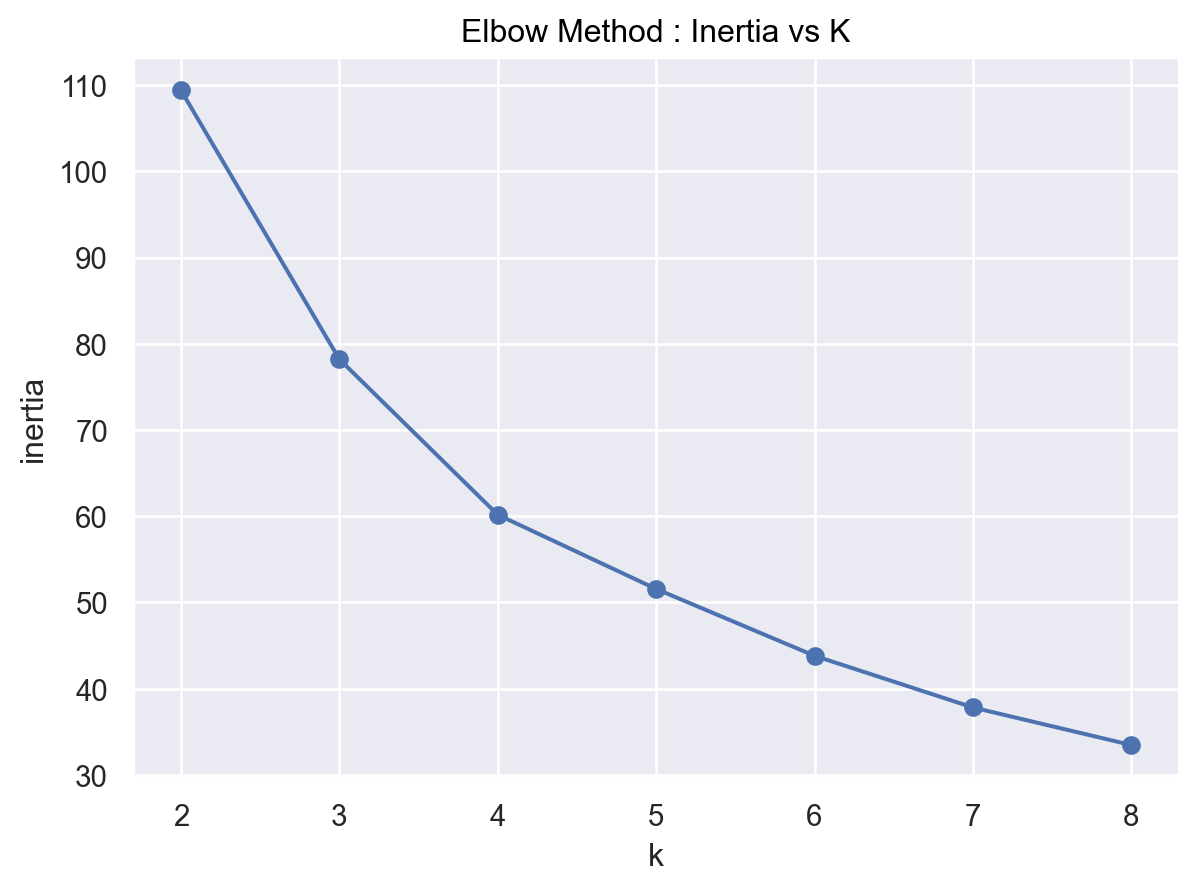

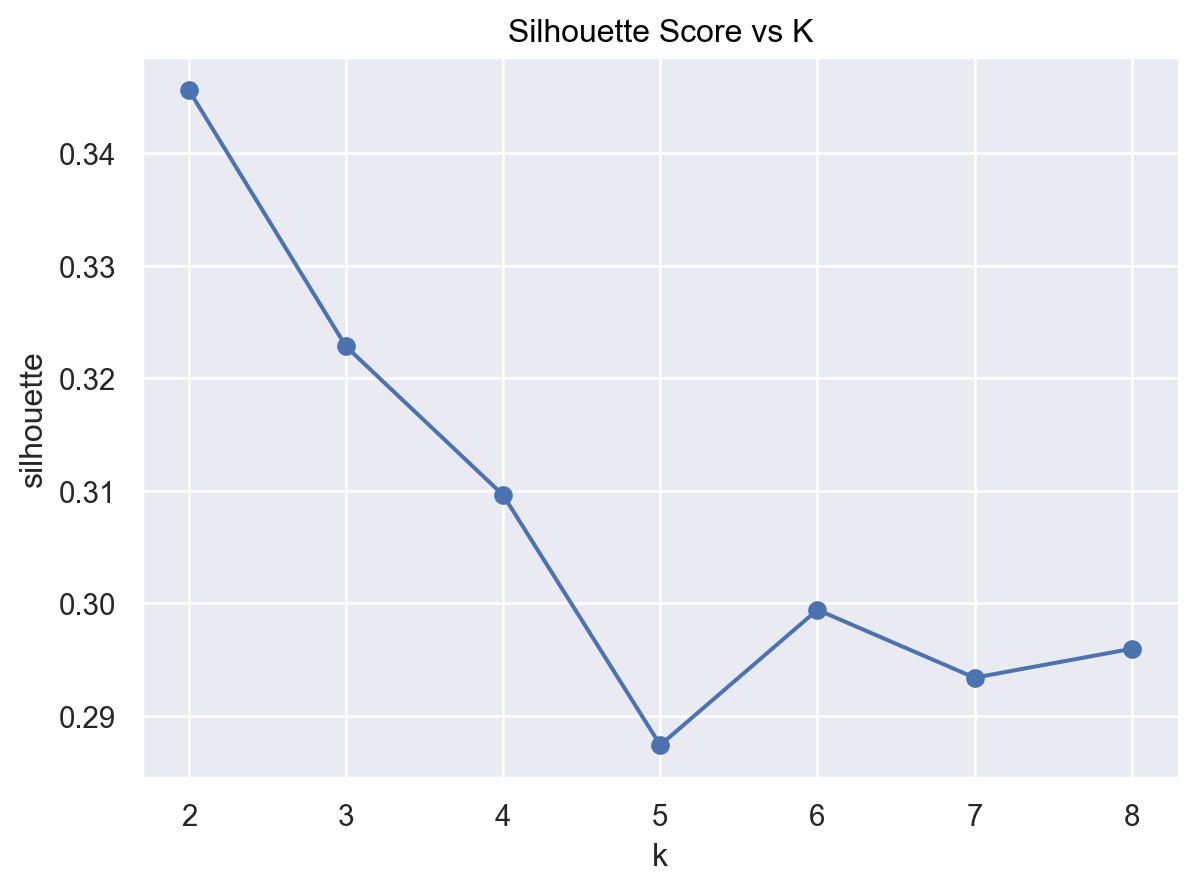

In [39]:
silhouette =[]
inertia=[]
for k in range(2,9):
    kmeans = KMeans(n_clusters=k,n_init=20,random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append([k,kmeans.inertia_])
    silhouette.append([k,silhouette_score(X_scaled,labels)])

inertia_df = pd.DataFrame(inertia, columns=['k','inertia'])
silhouette_df = pd.DataFrame(silhouette, columns=['k','silhouette'])
print("Inertia",inertia_df)
print("silhouette",silhouette_df)
display(
    inertia_df.pipe(so.Plot,x='k',y='inertia').add(so.Line(marker='o')).label(title="Elbow Method : Inertia vs K")
)

display(
   silhouette_df.pipe(so.Plot,x='k',y='silhouette').add(so.Line(marker='o')).label(title="Silhouette Score vs K")
)

# Step 8:  Applying K-Means Clustering to cluster U.S states based on the life style behaviors 

In [41]:
kmeans = KMeans(n_clusters =3, n_init=20,random_state=42)
us_clusters = kmeans.fit_predict(X_scaled)
nutrition_state_clusters = (nutrition_state_behavior.assign(Cluster= us_clusters)
                            .sort_values("Cluster"))
nutrition_state_clusters

Question,Obesity%,Inactivity%,Fruit intake < 1/day,Veg intake < 1/day,Cluster
LocationDesc,,,,,
Missouri,33.069231,26.815385,41.833333,18.466667,0
Wisconsin,32.138462,22.046154,36.700000,20.633333,0
Nebraska,32.538462,23.992308,39.700000,20.533333,0
Nevada,28.323077,24.723077,41.033333,23.833333,0
New Jersey,26.783333,25.708333,34.700000,20.500000,0
New Mexico,30.069231,23.376923,40.566667,22.166667,0
New York,26.530769,26.192308,34.900000,21.166667,0
North Carolina,32.038462,24.361538,38.633333,16.933333,0
North Dakota,32.769231,24.792308,40.466667,21.566667,0


In [42]:
print("Number of states per cluster:")
print(nutrition_state_clusters["Cluster"].value_counts().sort_index())
for i in (nutrition_state_clusters["Cluster"].unique()):
    print(f"\nCluster {i}:")
    print(nutrition_state_clusters[nutrition_state_clusters["Cluster"]==i].index.tolist())

Number of states per cluster:
Cluster
0    29
1    12
2     9
Name: count, dtype: int64

Cluster 0:
['Missouri', 'Wisconsin', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Texas', 'Virginia', 'Michigan', 'Maryland', 'Wyoming', 'Delaware', 'California', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Alaska', 'Arizona', 'Kansas', 'Iowa']

Cluster 1:
['Montana', 'New Hampshire', 'Utah', 'Washington', 'Minnesota', 'Maine', 'Vermont', 'Oregon', 'Connecticut', 'Colorado', 'Massachusetts', 'Idaho']

Cluster 2:
['West Virginia', 'Louisiana', 'Arkansas', 'Oklahoma', 'Indiana', 'Mississippi', 'Kentucky', 'Tennessee', 'Alabama']


In [43]:
nutrition_cluster_mean = (
    nutrition_state_clusters.groupby("Cluster").mean()
)
nutrition_cluster_mean

Question,Obesity%,Inactivity%,Fruit intake < 1/day,Veg intake < 1/day
Cluster,,,,
0,30.699182,24.462754,38.800575,20.063793
1,27.505128,20.485897,35.077778,16.802778
2,35.761325,30.525356,45.307407,20.596296


In [44]:
# Clustering Visualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_mean = (
    nutrition_cluster_mean.reset_index()
    .melt(id_vars="Cluster",var_name="Indicator", value_name="percent")
)
cluster_mean

,Cluster,Indicator,percent
0,0,Obesity%,30.699182
1,1,Obesity%,27.505128
2,2,Obesity%,35.761325
3,0,Inactivity%,24.462754
4,1,Inactivity%,20.485897
5,2,Inactivity%,30.525356
6,0,Fruit intake < 1/day,38.800575
7,1,Fruit intake < 1/day,35.077778
8,2,Fruit intake < 1/day,45.307407
9,0,Veg intake < 1/day,20.063793


# Seaborn Line Plot
### Cluster centroids line plot using seaborn.Each line represents the one lifestyle behavior.
- Obesity
- No leisure-time physical activity
- Fruit intake < 1/day
- Vegetable intake < 1/day
- The x-axis has three clusters
- Y-axis shows average percent values for each behavior
- Cluster 1: Healthiest
- Clsuter 0:Moderate
- CLuster 2:Highest Risk

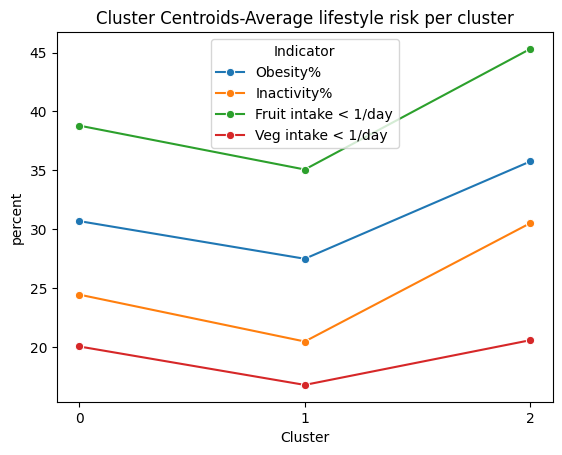

In [47]:
sns.lineplot(
    data =cluster_mean,
    x="Cluster",
    y="percent",
    hue="Indicator",
    marker="o"
)

plt.title("Cluster Centroids-Average lifestyle risk per cluster")
plt.xticks([0,1,2])
plt.show()

# Pairplot of lifestyle features by cluster

### Visualize the relationship between all lifestyle behaviors and how the U.S cluster based on these behaviors

Text(0.5, 1.02, 'Pair plot of life style behavior')

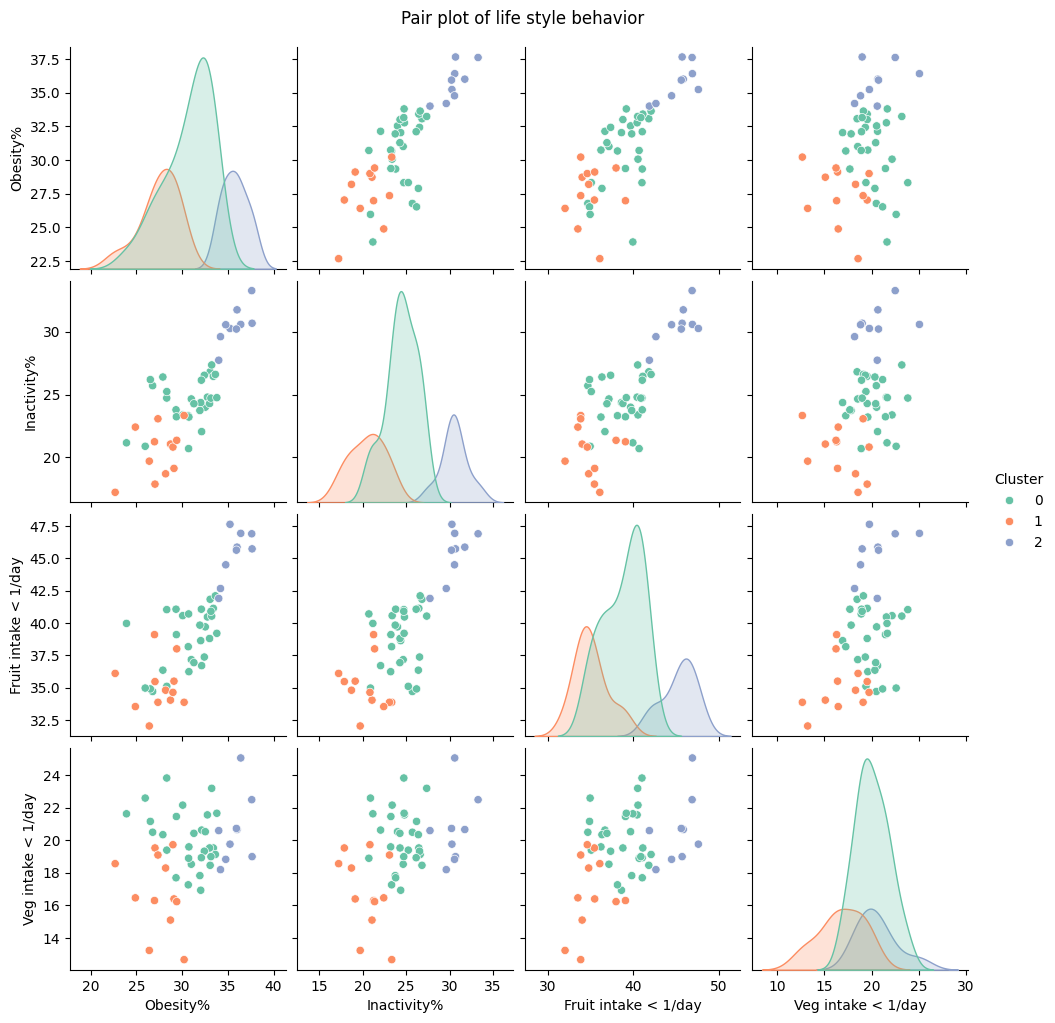

In [49]:
pair_plot_nutrition_set = nutrition_state_clusters.reset_index()
sns.pairplot(
    pair_plot_nutrition_set,
    vars=["Obesity%", "Inactivity%", "Fruit intake < 1/day", "Veg intake < 1/day"],
    hue="Cluster",
    palette ="Set2",
)
plt.suptitle("Pair plot of life style behavior", y = 1.02)



### The pairplot provides comprehensive visual summary of how the four key lifestyle behavior indicators across U.S states and how these behaviors define the three clusters. Each point represent a state and the colors correspond to the cluster assigned by KMeans algorithm. The diagonal plots show the distribution of each lifestyle variable with each cluster, where taller peak indicate a higher concentration of states around those values. The off-diagonal scatterplots reveal how the variables relate to this pairplot helps validate the clustering by showing bdistinct behavioral patterns across the three group of states

# Heat Map of US lifestyle profile

### This heat map provides a clear visual summary of lifestyle indicators across different states. Each row represents a state, and each column represents a lifestyle factor. The color intensity shows how high or low the percentages are. Darker colors usually represent lower values and brighter colors represent higher values. By using a heatmap we can identify the patterns , such as states with consistently high obesity and inactivity or states with healthier overall  profiles.

<Axes: xlabel='Question', ylabel='LocationDesc'>

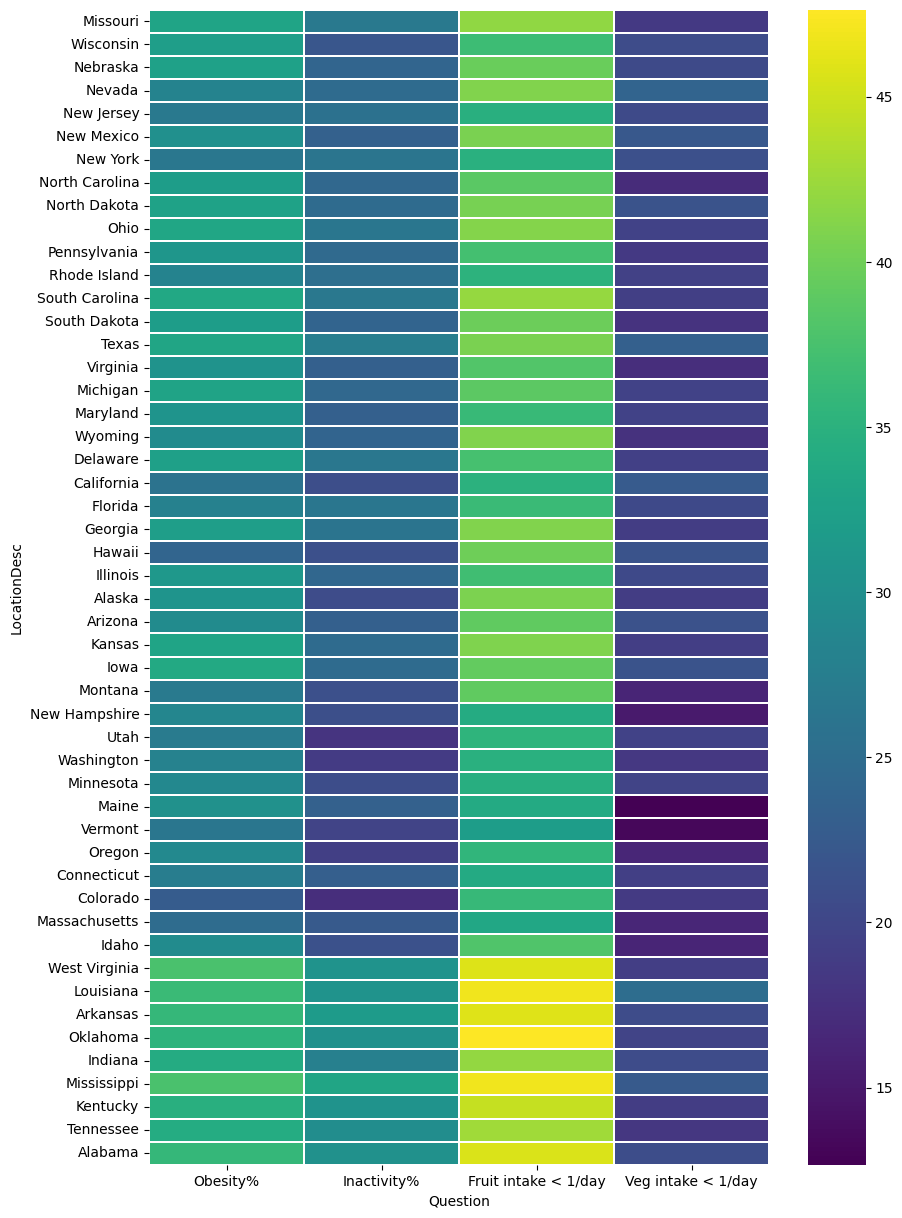

In [53]:
plt.figure(figsize=(10,15))
sns.heatmap(
    nutrition_state_clusters.drop(columns=["Cluster"]),
    cmap="viridis",
    linewidth=0.2
)